# DAI-101 Assignment 1


Import the Libraries

In [74]:
# # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# import the dataset
df = pd.read_csv('data/CrimesOnWomenData.csv')

# Data Pre-processing and Cleaning

In [76]:
#df.drop('', axis=1)
df.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


Total Number of Crimes against Women over the years

In [77]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

In [78]:
# creating a total cases column
df['TotalCases'] = df[['Rape','K&A','AoW','AoM','DD','DV',"WT"]].sum(axis=1)
# Summary statistics
df.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT,TotalCases
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565,6613.752717
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660,9056.583832
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000,146.750000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000,2632.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000,10299.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000,52246.000000


# Univariate Analysis

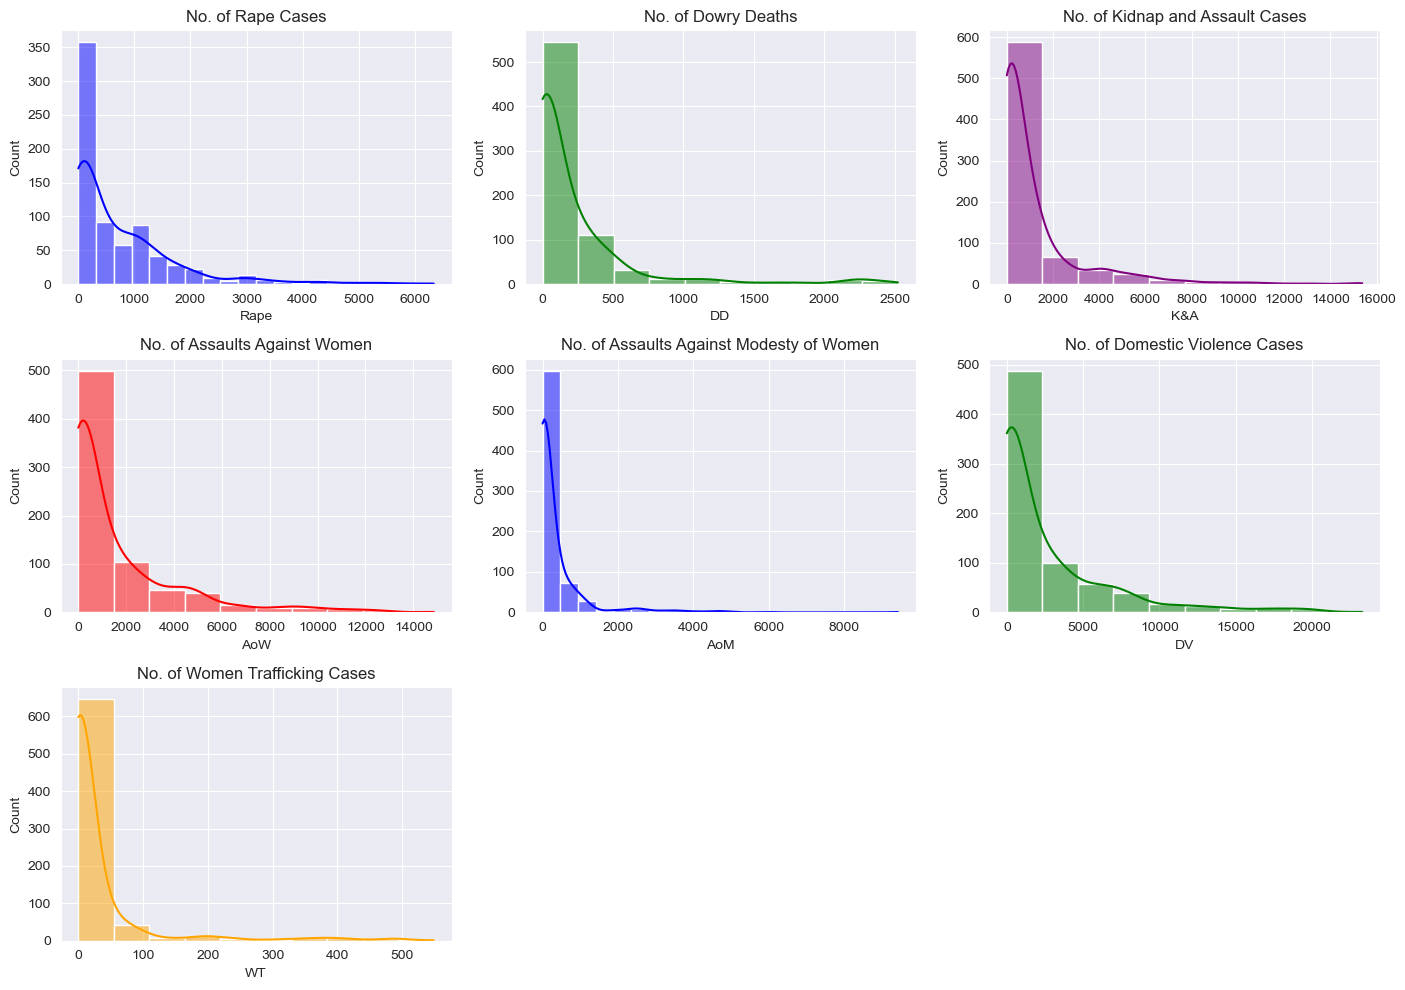

In [79]:
# Setting up the plot
plt.figure(figsize=(14, 10))

# Histograms for 'Rape', 'DD', 'K&A', 'AoW', 'AoM', 'DV', and 'WT'
plt.subplot(3, 3, 1)
sns.histplot(df['Rape'], bins=20, color='blue', kde=True)
plt.title('No. of Rape Cases')

plt.subplot(3, 3, 2)
sns.histplot(df['DD'], bins=10, color='green', kde=True)
plt.title('No. of Dowry Deaths')

plt.subplot(3, 3, 3)
sns.histplot(df['K&A'], bins=10, color='purple', kde=True)
plt.title('No. of Kidnap and Assault Cases')

plt.subplot(3, 3, 4)
sns.histplot(df['AoW'], bins=10, color='red', kde=True)
plt.title('No. of Assaults Against Women')

plt.subplot(3, 3, 5)
sns.histplot(df['AoM'], bins=20, color='blue', kde=True)
plt.title('No. of Assaults Against Modesty of Women')

plt.subplot(3, 3, 6)
sns.histplot(df['DV'], bins=10, color='green', kde=True)
plt.title('No. of Domestic Violence Cases')

plt.subplot(3, 3, 7)
sns.histplot(df['WT'], bins=10, color='orange', kde=True)
plt.title('No. of Women Trafficking Cases')

plt.tight_layout()
plt.show()

# Multivariate Analysis

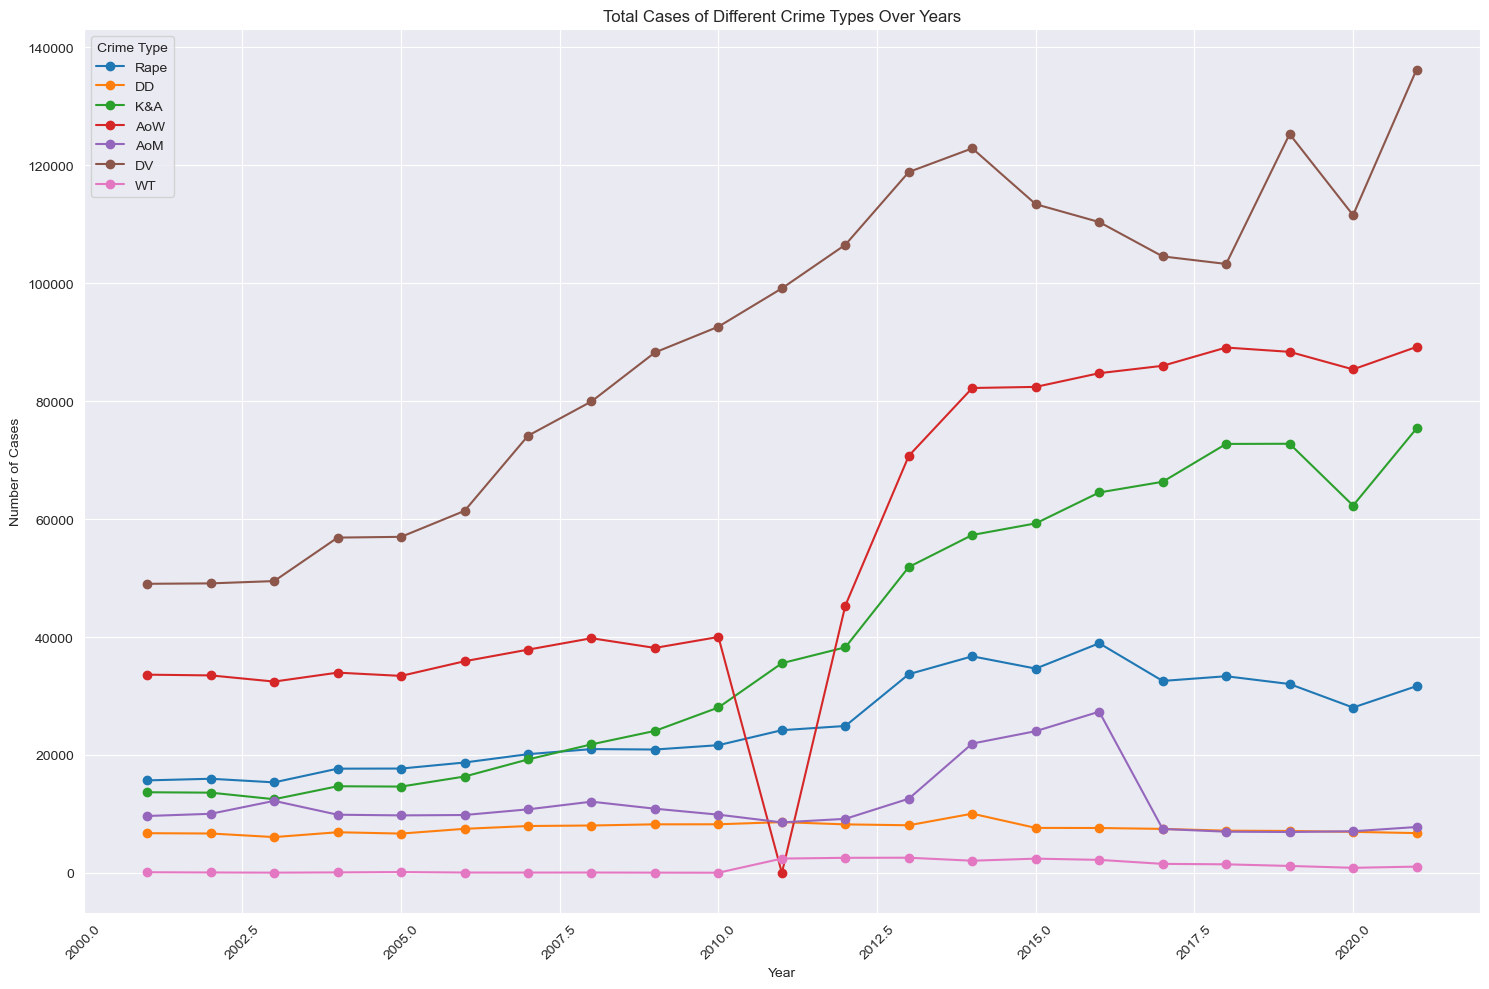

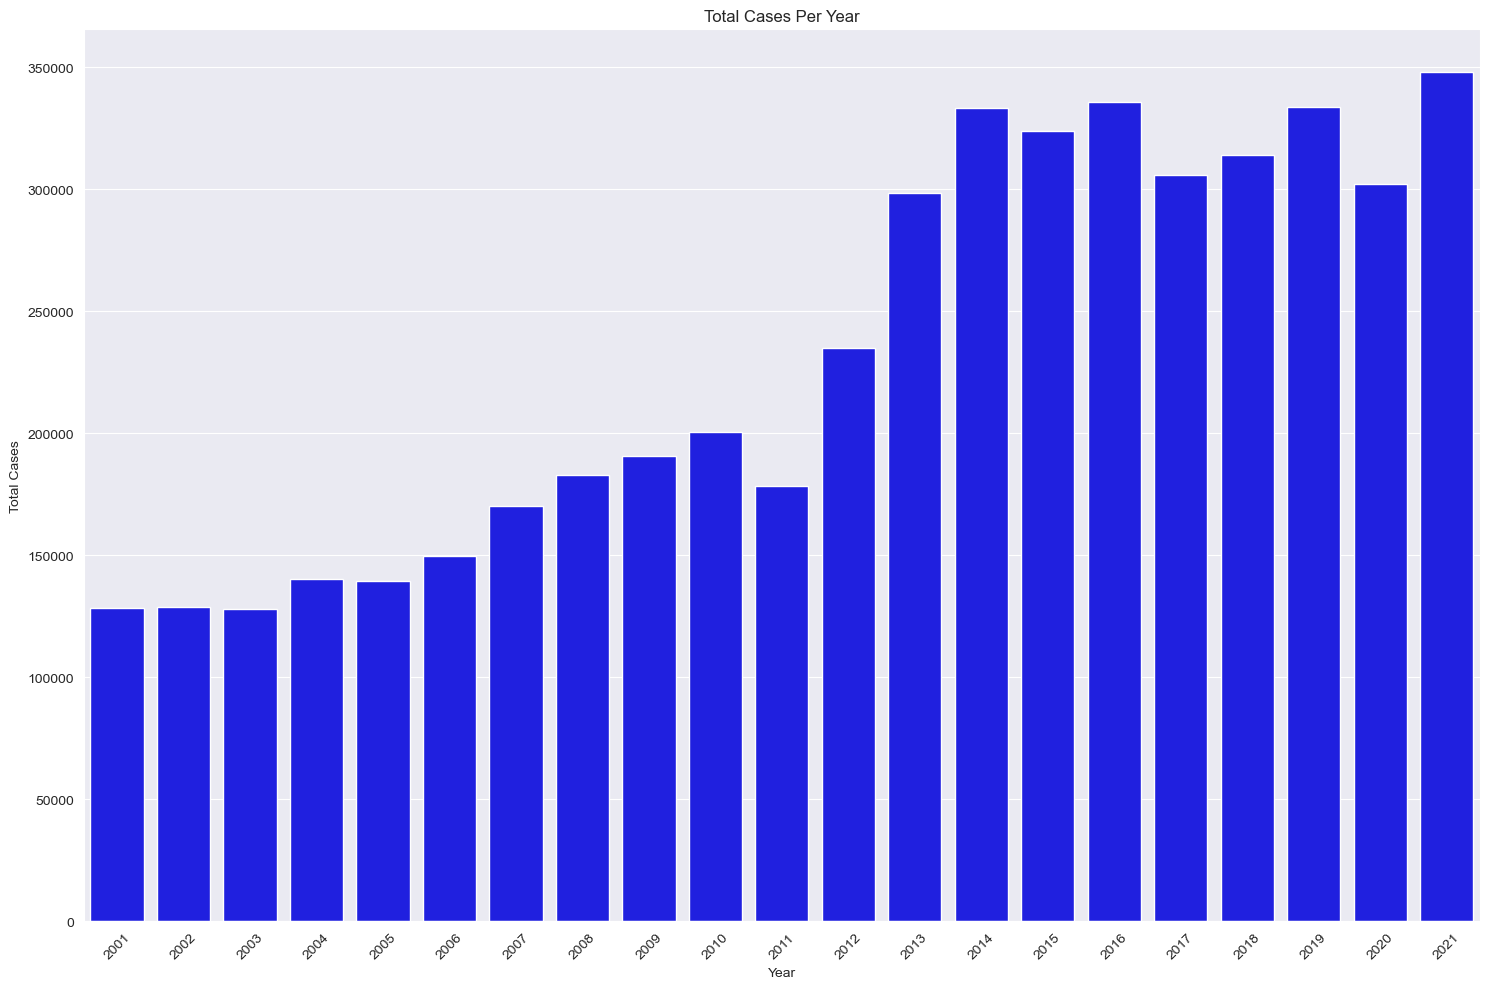

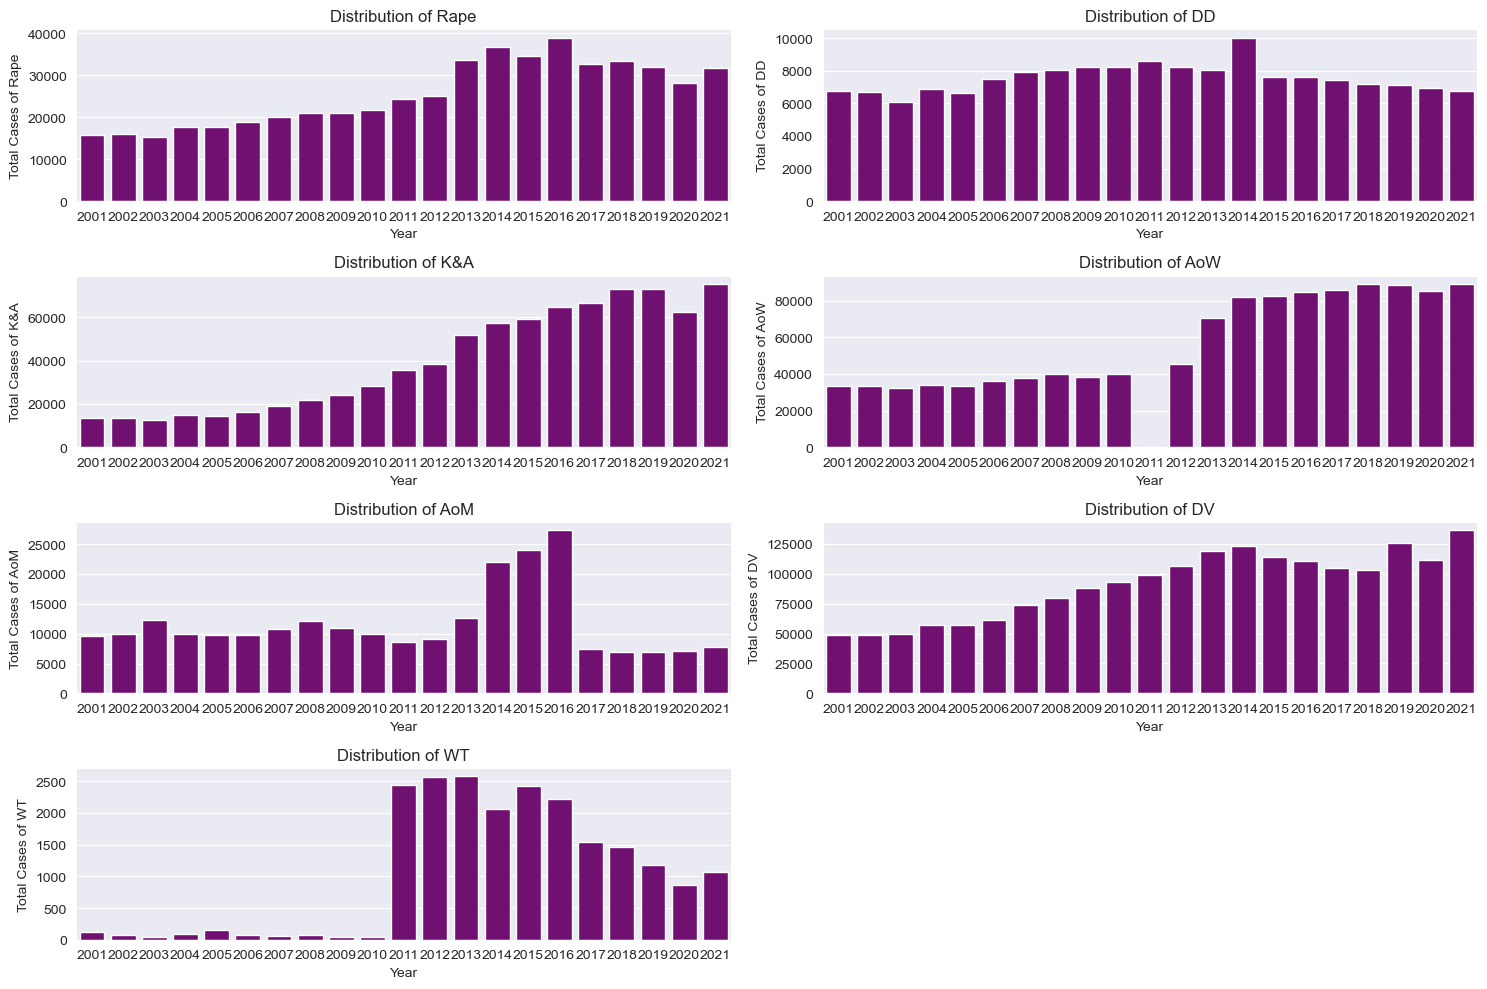

In [80]:
# List of columns of crimes
columns = ['Rape', 'DD', 'K&A', 'AoW', 'AoM', 'DV', 'WT']

# Line plot for Total Cases Over Years
plt.figure(figsize=(15, 10))

for column in columns:
    # Group by Year and sum up for each crime type
    yearly_data = df.groupby('Year')[column].sum().reset_index()
    plt.plot(yearly_data['Year'], yearly_data[column], marker='o', label=column)

# Customizing the plot
plt.title('Total Cases of Different Crime Types Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Crime Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar plot for Total Cases Per Year
plt.figure(figsize=(15, 10))

year_wise_data = df.groupby('Year')['TotalCases'].sum().reset_index()
sns.barplot(data=year_wise_data, x='Year', y='TotalCases', color='blue')

# Customizing the plot
plt.title('Total Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Subplots for Distribution of Each Column
plt.figure(figsize=(15, 10))

# Iterating over columns (Total = 7)
for i, column in enumerate(columns):
    plt.subplot(4, 2, i + 1) 
    # Group by Year and sum for each crime type
    yearly_crime_data = df.groupby('Year')[column].sum().reset_index()
    sns.barplot(data=yearly_crime_data, x='Year', y=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Year')
    plt.ylabel(f'Total Cases of {column}')

plt.tight_layout()
plt.show()

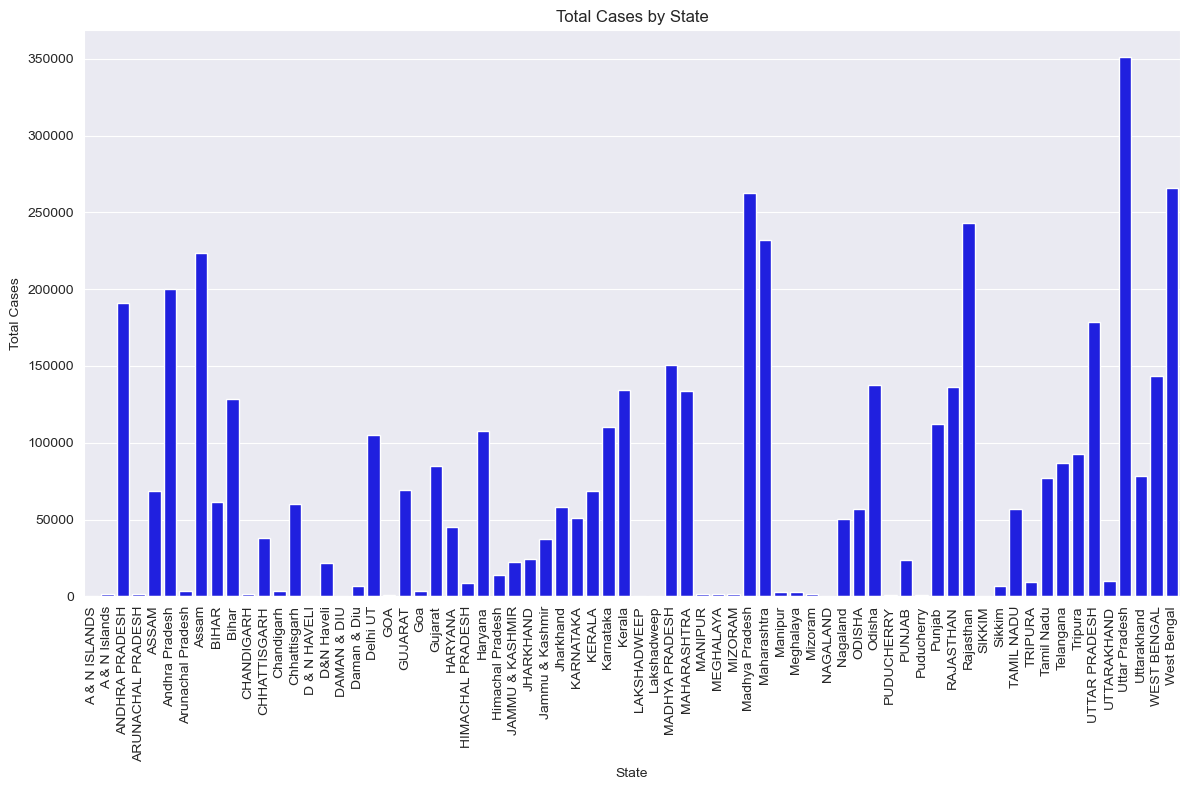

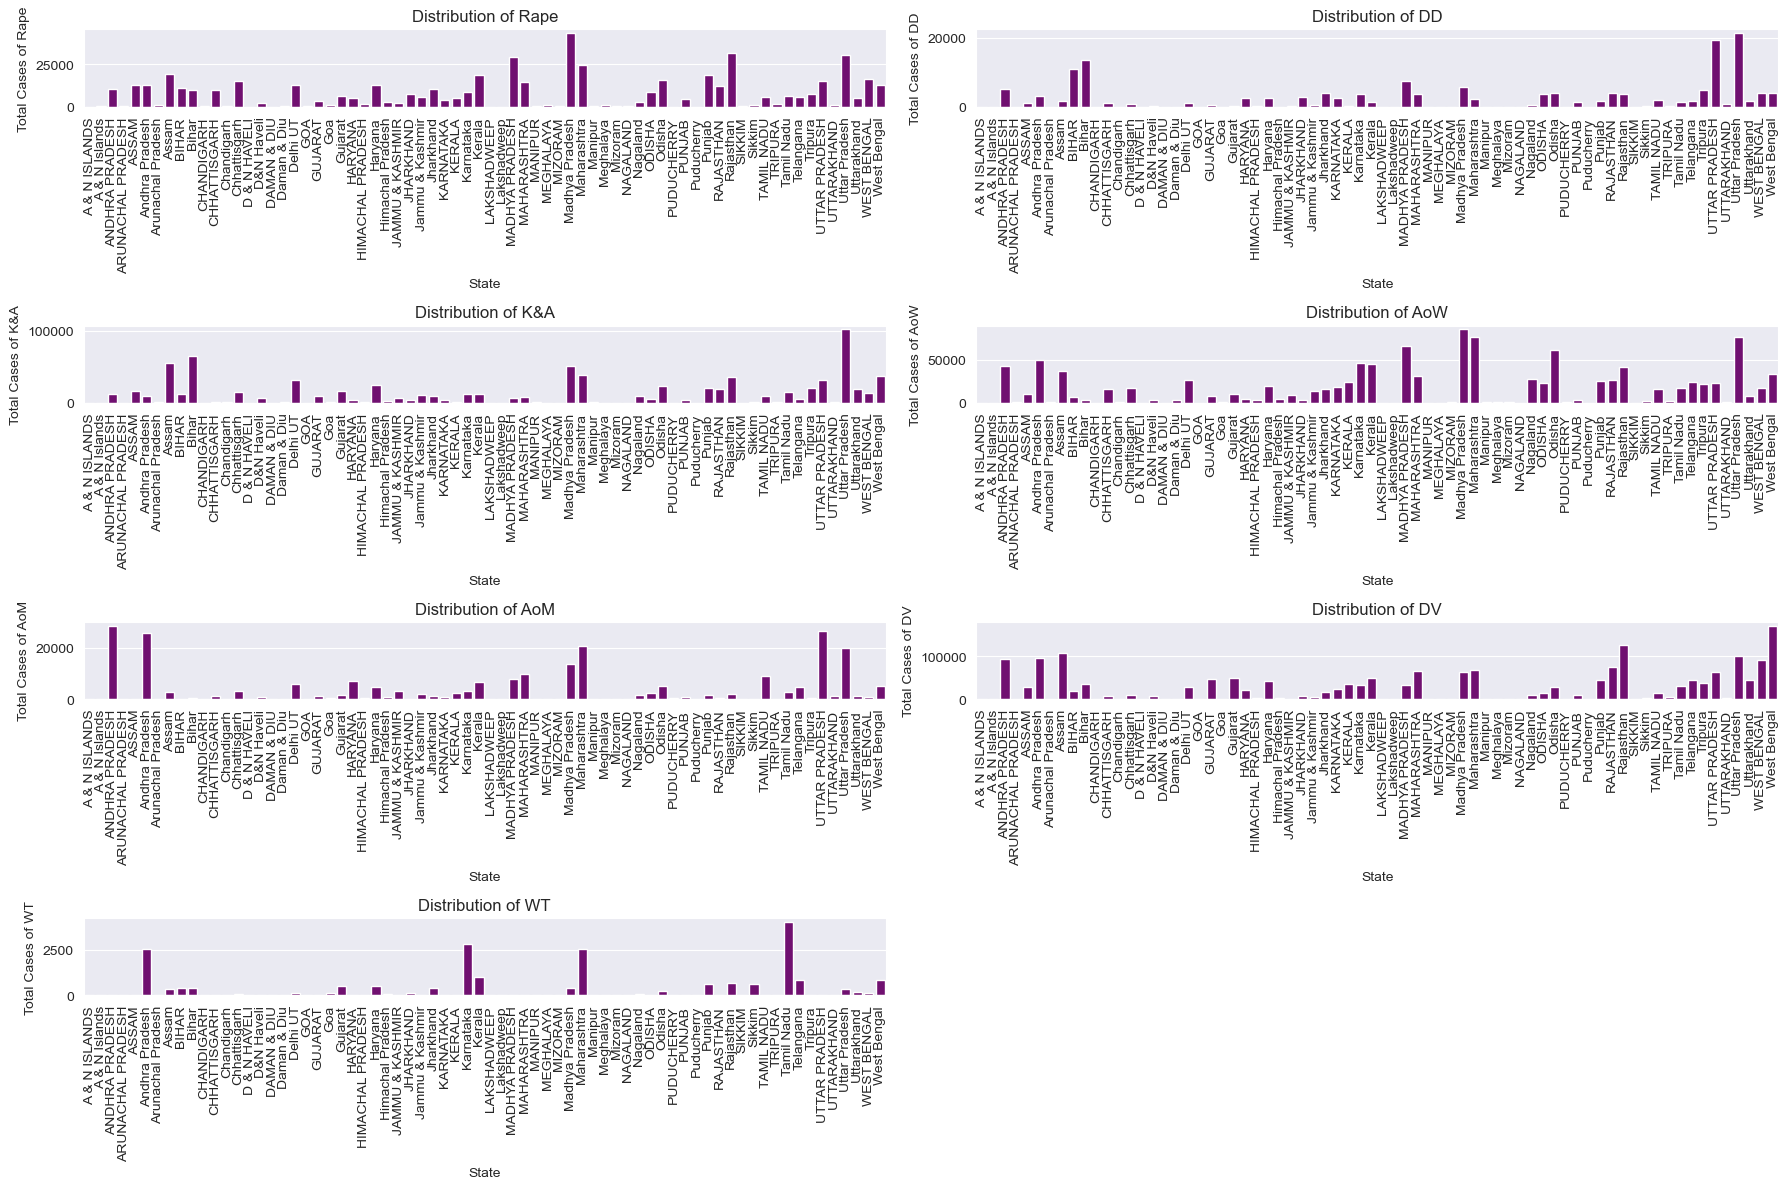

In [81]:
# grouping the data by states
state_wise_data = df.groupby('State')['TotalCases'].sum().reset_index()

# Bar plot for Total Cases by State
plt.figure(figsize=(12, 8))
sns.barplot(data=state_wise_data, x='State', y='TotalCases', color='blue')

plt.title('Total Cases by State')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Subplots for Distribution of Each Column
plt.figure(figsize=(18, 12))

# Iterating over columns
for i, column in enumerate(columns):
    plt.subplot(4, 2, i + 1)  # Create a subplot for each column
    yearly_crime_data = df.groupby('State')[column].sum().reset_index()
    sns.barplot(data=yearly_crime_data, x='State', y=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel('State')
    plt.ylabel(f'Total Cases of {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()